### Table Of Contents
1. Flowchart Of Alarm Clock
2. Import Modules
3. Create Global Variables
4. Create A Function To Update Live Clock
5. Create A Function To Set alarm
6. Create A Function To Turn Off Alarm
7. Set Up GUI
8. Create Checkbox For Each Day
9. Start Clock And Mainloop

### 1. Flowchart Of Alarm Clock
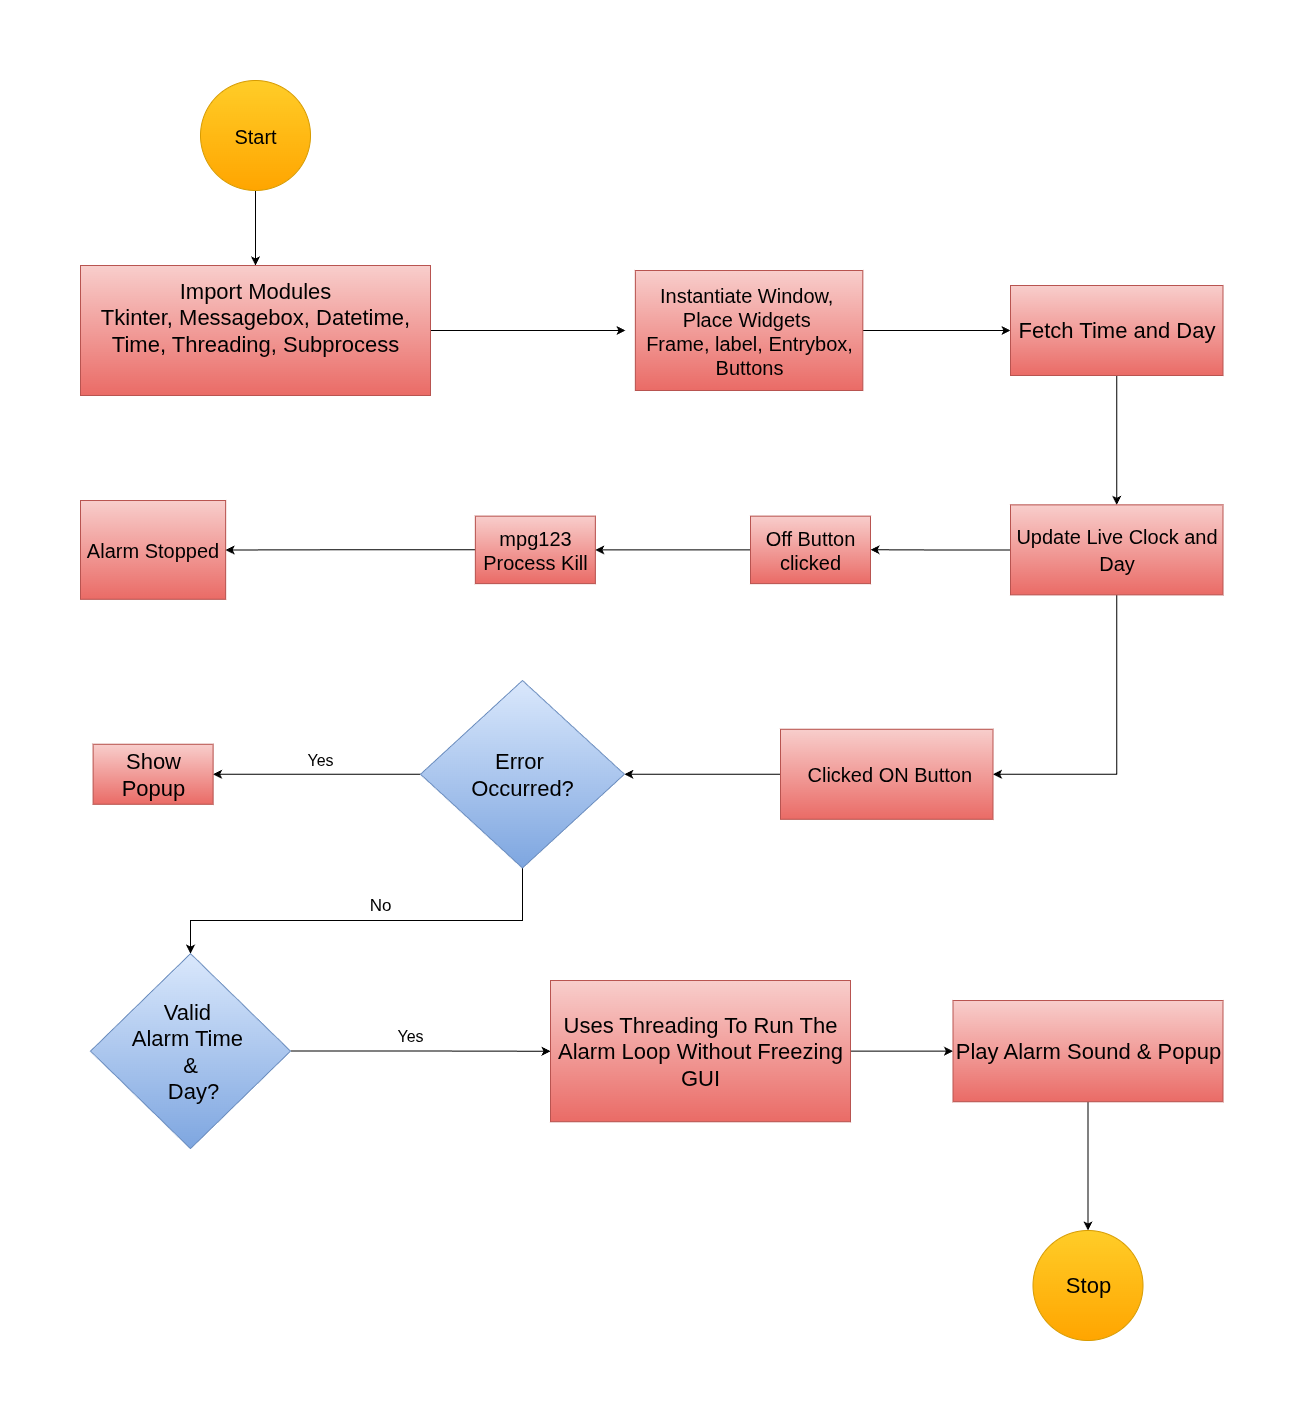

### 2. Import Modules
First, I imported the necessary Python modules. I imported tkinter so that I can create a graphical user interface. For popup message alerts, I brought in messagebox, and I used datetime to fetch the current date and time. The time module helps with delays like sleep, while threading is also a very important module that ensures the alarm runs in the background without freezing the GUI. Finally, I included subprocess to play the audio file at the set alarm time.

```
# Import necessary modules
import tkinter as tk                            
from tkinter import messagebox                  
from datetime import datetime                   # For current date/time
import time                                     # For sleep
import threading                                # To run alarm without freezing GUI
import subprocess                               # To run system commands (play audio)

### 3. Create Global Variables
I am creating global variables to manage the alarm functionality. The variable running is set to ```True```, which I will use as a flag to control whether the alarm thread should keep running or stop. The variable ```alarm_thread``` is initialized as None, and later it will hold the reference to the thread that checks and triggers the alarm. These globals help me easily manage the state of the alarm across the program.

```
# Global variables to manage alarm thread
running = True
alarm_thread = None

### 4. Create A Function To Update Live Clock
The live clock that continuously displays the current time and day is crucial, since we set time seeing the current time & day. To update live clock I create a function as ```update_clock()```.
Using ```datetime.now()```, I fetch the system’s present time and format it into a readable 12-hour format with AM/PM in a variable ```current_time```. We also get the full weekday name and keep at ```current_day```. These values are displayed on the labels through ``` live_clock_label.config()``` and ```live_day_label.config()```. I use ```root.after(1000, update_clock)``` to call the same function again every second. Thus, it keeps refreshing the display without the main application.

```
# FUNCTION TO UPDATE LIVE CLOCK
def update_clock():
    current_time = datetime.now().strftime("%I:%M:%S %p")  # Format current time (e.g., 08:45:01 PM)
    current_day = datetime.now().strftime("%A")            # Get full day name (e.g., "Tuesday")

    # Update the labels with current time and day
    live_clock_label.config(text=current_time)
    live_day_label.config(text=current_day)

    # Call this function again after 1 second (1000 milliseconds)
    root.after(1000, update_clock)

### 5. Create A Function To Set Alarm
I create a function called ```set_alarm()``` to run the alarm. Inside this function, I first use two global variables: ```running``` and ```alarm_thread```. The ```running``` variable works like a switch to control whether the alarm should keep checking the time, and ```alarm_thread``` will store the background thread where the alarm runs. We retrieve the value from the entry box and keeps at a variable ```alarm_time``` and then update the label to confirm.

Next, inside it I create another small function called ```alarm()```, which runs in a separate thread. This function goes into a loop, checking every second to see if the current time and day match the time and day chosen by us. If they match, it plays the alarm sound ```(alarm_clock.mp3)``` and shows a popup message “Wake Up!”. If something goes wrong, an error message is shown as "Error". Finally, I start the background thread using ```threading.Thread```. It makes sure the checking happens in the background without freezing the main GUI.

```
def set_alarm():
    global running, alarm_thread
    running = True                                          # Enable alarm loop
    alarm_time = entry_time.get()                           # Get the alarm time entered by user
    label.config(text=f"Alarm set for {alarm_time}")        # Show alarm time on screen

    # Function to run in separate thread
    def alarm():
        try:
            while running:
                now = datetime.now()
                current_time = now.strftime("%I:%M %p").strip().upper()     # Format: "08:30 PM"
                current_day = now.strftime("%A")                            # e.g., "Monday"
                alarm_time_clean = alarm_time.strip().upper()              # Clean user input

                # Check: if current time == alarm time and the selected day matches
                if current_time == alarm_time_clean and days_selected.get(current_day, tk.BooleanVar()).get():
                    subprocess.run(["mpg123", "alarm_clock.mp3"])          # Play alarm sound (Linux)
                    messagebox.showinfo("Alarm", "Wake Up!")               # Show popup
                    break
                time.sleep(1)                                              # Wait 1 second before checking again
        except:
            messagebox.showerror("Error", "Something is wrong!")           # Show error popup

    # Start the alarm thread
    alarm_thread = threading.Thread(target=alarm)
    alarm_thread.start()

### 6. Create A Function To Turn Off Alarm
To turn off the alarm, I create a function as ```off_alarm()```. The variable running is set to False. It immediately stops the alarm loop running in the background thread. At the same time, the label on the screen is updated with the text “Alarm Stopped.” I use the ```subprocess.run(["pkill", "mpg123"])``` to stop the audio. Now, the alarm completely shuts down. It stops both in the program and in the system’s audio process.

```
# FUNCTION TO TURN OFF ALARM 
def off_alarm():
    global running
    running = False                                # Stop alarm loop
    label.config(text="Alarm Stopped")             # Show status on screen
    subprocess.run(["pkill", "mpg123"])            # Kill audio process (Linux specific)


### 7. Set Up GUI
##### 7.1 Window:
Here, I am initializing the main application window using ```tk.Tk()```. I set the title of the window to “Alarm Clock”. Along with it I also set the background color and the size. These settings decide how the window looks on the screen, and you can change them according to your own preference.

```
root = tk.Tk()
root.title("Alarm Clock")                          # Title of the window
root.configure(bg="white")                         # Background color
root.geometry("640x380")                           # Window size


##### 7.2 Label
I create and place the labels. First, I define ```live_day_label``` to display the current day, styled font and set color for the font & label. Next, I add ```live_clock_label```, which will show the current time, using the same styling. Finally, I create a smaller label named ```label``` with the text “Set time”, which guides us to enter our alarm time.

```
# Live Day Label
live_day_label = tk.Label(root, font=("Arial, 24"), fg="blue", bg="white")
live_day_label.pack(pady=10)

# Live Clock Label
live_clock_label = tk.Label(root, font=("Arial, 24"), fg="blue", bg="white")
live_clock_label.pack(pady=10)

# Label for alarm setting
label = tk.Label(root, text="Set time", font=("Arial", 14), fg="blue", bg="white")
label.pack(pady=10)


##### 7.3 Entrybox
Here, I am adding an entry widget where we can type in the alarm time. By default, the entry box is pre-filled with "00:00 AM", so that it will not be a problem for us to enter the time. I also use pack(pady=10, ipady=10) to add vertical spacing around the widget and increase the inner padding, making the entry field taller and easier to interact with.

```
entry_time = tk.Entry(root, font=("Arial, 24"), width=30, justify="center")
entry_time.insert(0, "00:00 AM")                   # Default value
entry_time.pack(pady=10, ipady=10)


##### 7.4 Frame
Here, I create an empty frame inside the main window using ```tk.Frame(root)```. This frame is useful to keep buttons, checkboxes, or any other widgets together in an organized way.

```
# Empty frame (for future use if needed)
frame = tk.Frame(root)
frame.pack(pady=5)


##### 7.5 Buttons
Here, I create the ON and OFF buttons to control the alarm.

The ON button is styled with font,text and color. When we click it, ```the set_alarm``` function is called, which activates the alarm in a separate thread. 

The OFF button is designed similarly. When clicked, it triggers the ```off_alarm function```, which stops the alarm sound and ends the alarm loop. 

Both buttons are placed neatly in the window. I use ```ipady/ipadx``` to adjust the internal spacing, making them more user-friendly.

```
# ON Button
on_button = tk.Button(root, 
                      text="ON", 
                      font=("Arial", 16), 
                      fg="black", 
                      bg="lightblue", 
                      activebackground="blue", 
                      activeforeground="white", 
                      command=set_alarm)           # Calls set_alarm
on_button.pack(pady=10, ipady=5)

# OFF Button
off_button = tk.Button(root, 
                       text="OFF", 
                       font=("Arial", 16), 
                       bg="lightblue", 
                       fg="black", 
                       activebackground="blue", 
                       activeforeground="red", 
                       command=off_alarm)          # Calls off_alarm
off_button.pack(pady=10, ipadx=2)


### 8. Create Checkbox For Each Day
In this section, I am adding day selection checkboxes so the user can choose on which days the alarm should ring.

First, I create a dictionary called ```days_selected``` to store the BooleanVar values for each day.
I also define a list named days that contains all seven weekdays.
Next, I add a label “Select Day(s) for Alarm:” to give instructions to the user.
To organize the checkboxes neatly, I create a separate frame called ```checkbox_frame```.
Inside a loop, I create one Checkbutton for each day. Each checkbox is linked to a BooleanVar, which lets the program check later whether that day is selected or not. I also style the checkboxes by setting the font, text color, and background color. Additionally, I use anchor="w" to left-align the day names and adjust the padding for better spacing.

Finally, I store each BooleanVar in the ```days_selected``` dictionary with the day name as the key. This makes it easy to check later if a specific day was chosen when the alarm is triggered.

```
# DAY SELECTION CHECKBOXES 
days_selected = {}                                 # Dictionary to store each day's BooleanVar
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Label for day selection
tk.Label(root, text="Select Day(s) for Alarm:", font=("Arial, 24"), fg="blue", bg="white").pack(pady=5, ipady=10)

# Create a frame to hold checkboxes
checkbox_frame = tk.Frame(root, bg="white")
checkbox_frame.pack(pady=10)

# Add a checkbox for each day
for i, day in enumerate(days):
    var = tk.BooleanVar()                           # Variable to hold checkbox value
    chk = tk.Checkbutton(checkbox_frame, 
                         text=day, 
                         variable=var, 
                         font=("Arial", 14),
                         fg="blue",
                         bg="lightgray",
                         activeforeground="red", 
                         width=15,                  # Width of checkbox text
                         anchor="w",                # Left align text
                         padx=10)                   # Padding
    chk.grid(row=i, column=0, sticky="w", padx=20, pady=10, ipady=2)

    days_selected[day] = var                        # Save variable to dictionary


### 9. Start Clock And Mainloop  
I call ```update_clock()```, which begins the continuous updating of the current time and day on the screen every second.
Then, ```root.mainloop()```to run the main application. Without ```mainloop()```, the window would close immediately after running the script, so this line is essential to keep the alarm clock application interactive and running.

```
# START CLOCK AND MAINLOOP 
update_clock()                                     # Start updating time
root.mainloop()                                    # Start GUI event loop
